In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 3:

part 2:

In [2]:
#define image1 here

image1=np.array([[150,151,153,155,156,155,154],
                 [150,151,153,155,156,155,154],
                 [150,151,153,155,156,155,154],
                 [150,151,153,155,156,155,154],
                 [150,151,153,155,156,155,154]])
image1=np.float32(image1)      


In [7]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    hist=cv2.calcHist([image],[0],None,[256],[0,256])
    shift_value = 1
    axis_value = 1
    shifted_image = np.roll(image, shift_value, axis=axis_value)
    print(shifted_image)
    return(hist)

[[154. 150. 151. 153. 155. 156. 155.]
 [154. 150. 151. 153. 155. 156. 155.]
 [154. 150. 151. 153. 155. 156. 155.]
 [154. 150. 151. 153. 155. 156. 155.]
 [154. 150. 151. 153. 155. 156. 155.]]


Text(0.5, 1.0, 'histogram')

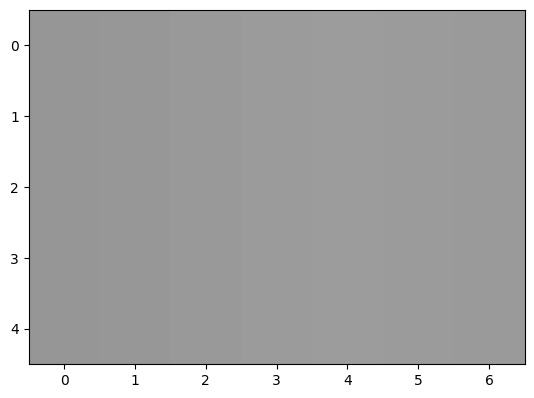

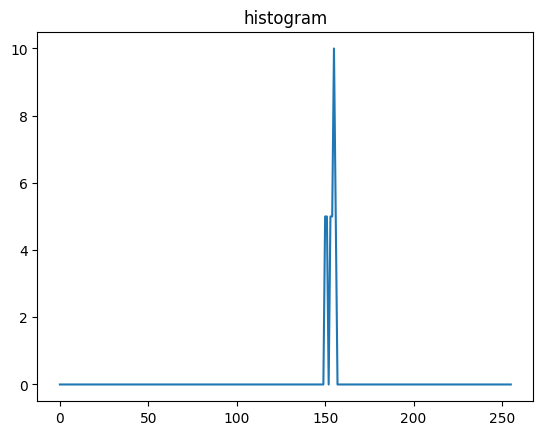

In [8]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [ ]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  # Start
  minout=np.min(output_image)
  maxout=np.max(output_image)
  num_rows = np.shape(output_image)[0]
  num_columns = np.shape(output_image)[1]
  
  for row in range(0,num_rows):
        for col in range(0,num_columns):
              #We act according to the formula
              output_image[row,col]=int(((output_image[row,col]-minout)/(maxout-minout))*(255)+0)
  # End
  return output_image


In [ ]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))
plt.title('new histogram')

# part3


In [ ]:
# first read the image and show it.(image2)

img = cv2.imread(r'Q3_image/image2.jpg',0)
# print(img)
plt.imshow(img,cmap='gray')
plt.show()
# plt.plot(calc_hist(img))
# plt.title('new histogram')

# plt.show()
# cv2.imshow('image', img)
# cv2.waitKey(0)       
# cv2.destroyAllWindows()


In [ ]:
#use stretch function to improve quality of the image and show it
plt.imshow(stretch_hist(img),cmap='gray')


In [ ]:
#define new function that can improve this image 

def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  output_image = image.copy()
  ############
  # Your code
  #covert 2d to 1d
  array1d=output_image.flatten()
  #then sort 1d
  array1d.sort()
  #calculate 1.3% min element array
  minindex=int((1.3/100)*len(array1d))
  minafterclip=array1d[minindex]
  #calculate 1.3% max element array
  maxindex=int(len(array1d)-minindex)
  maxafterclip=array1d[maxindex]
  print(array1d)
  print(maxafterclip,minafterclip,minindex,maxindex)
  
  num_rows = np.shape(output_image)[0]
  num_columns = np.shape(output_image)[1]
  
  for row in range(0,num_rows):
        for col in range(0,num_columns):
              #we check elements be within the range and then stretch
              if output_image[row,col]>=minafterclip and output_image[row,col]<=maxafterclip:                    
                output_image[row,col]=((output_image[row,col]-minafterclip)/(maxafterclip-minafterclip))*(255)+0
             
  # End
  ############
  return output_image


[  0   0   0 ... 255 255 255]
134 68 3407 258737


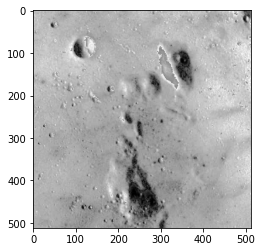

In [24]:
#try your new function and show the result
plt.imshow(modified_stretch_hist(img),cmap='gray')
